In [136]:
import argparse
from ddpm.denoising_diffusion_pytorch import Unet, GaussianDiffusion, Trainer, Galaxies
import torch
import wandb

wandb.init()

%load_ext autoreload
%autoreload 2

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


loss,█▇▄▃▂▁▂█▆▄▂▂▂▁▁▂▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▂
step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█
loss,0.16739
step,13


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda')

In [138]:
model = Unet(
    dim = 128,
    dim_mults = (1, 2, 4)
).to(device=DEVICE)

diffusion = GaussianDiffusion(
    model,
    image_size =128,
    timesteps = 500,
    loss_type = 'l2'
).to(device=DEVICE)

In [139]:
# args = {'dataset': 'desi_bgs'}
# wandb.watch(diffusion, log_freq=100)

In [140]:
trainer = Trainer(
    diffusion,
    '/pscratch/sd/s/sihany/desiimages/',
    logdir = '/pscratch/sd/s/sihany/logs/desi/',
    image_size = 128,
    train_batch_size = 32,
    train_lr = 5e-5,
    train_num_steps = 10000,         # total training steps
    gradient_accumulate_every = 4,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    step_start_ema = 400,
    save_every = 100,
    sample_every = 200,
    num_workers=16,
    # rank = [0, 1, 2]
)

In [ ]:
trainer.train()

sampling loop time step: 100%|██████████| 500/500 [00:23<00:00, 21.43it/s]


tensor([[[129., 247., 139.,  ...,   0., 116., 166.],
         [255.,   2.,  95.,  ...,   0., 245., 255.],
         [108., 254., 254.,  ..., 254., 212., 111.],
         ...,
         [255.,  87.,  13.,  ...,  53.,  52.,   9.],
         [255., 242., 250.,  ...,   3., 218., 126.],
         [ 90., 255.,  61.,  ...,  14., 255., 220.]],

        [[  3.,  40., 132.,  ..., 249.,  43.,  26.],
         [  6., 234., 179.,  ..., 101.,   6.,   0.],
         [ 12.,   2.,   2.,  ..., 130.,  55., 238.],
         ...,
         [  2., 255.,  83.,  ..., 255.,   2., 251.],
         [188., 200., 164.,  ...,  26.,  26., 238.],
         [  0., 197.,  62.,  ..., 114.,   1., 224.]],

        [[248.,  60., 211.,  ...,  20., 191., 236.],
         [ 18., 254., 126.,  ..., 212.,  73.,  74.],
         [ 96.,   5., 135.,  ..., 100.,  16., 238.],
         ...,
         [ 45., 200., 113.,  ..., 177., 255., 214.],
         [120., 237.,   4.,  ..., 251., 241., 255.],
         [247., 251.,   0.,  ..., 181., 244.,  25.]]]

sampling loop time step: 100%|██████████| 500/500 [00:23<00:00, 21.44it/s]09it/s]


tensor([[[175.,  91.,  18.,  ..., 185.,  11.,  25.],
         [  7., 134.,  66.,  ...,  76., 106.,   0.],
         [ 68.,  63.,  95.,  ...,  55., 128., 114.],
         ...,
         [156., 102.,  63.,  ...,  60., 129., 188.],
         [175., 130., 176.,  ...,  82.,  46., 108.],
         [210., 254.,  29.,  ...,  32., 206., 255.]],

        [[ 43.,  40.,  31.,  ..., 192.,  49.,  14.],
         [  0.,  49., 111.,  ...,  83.,  60.,  23.],
         [ 35.,  58., 108.,  ...,  94., 140., 146.],
         ...,
         [199.,  79., 170.,  ..., 123.,  95., 254.],
         [187., 158., 192.,  ..., 121.,  73., 152.],
         [ 71., 119., 103.,  ..., 253.,   2.,  49.]],

        [[255.,  59., 116.,  ...,  12., 100.,  77.],
         [140., 161., 137.,  ..., 109., 131., 251.],
         [192.,  80., 145.,  ...,  74., 159., 235.],
         ...,
         [213., 110.,  74.,  ..., 121.,  82.,  28.],
         [ 69.,  28., 181.,  ..., 170., 252., 116.],
         [245., 134.,  19.,  ...,   2.,  94., 103.]]]

sampling loop time step: 100%|██████████| 500/500 [00:23<00:00, 21.44it/s]09it/s] 


tensor([[[157.,  10., 132.,  ..., 158.,   1.,  76.],
         [ 15.,  88., 100.,  ...,  94.,  67.,   0.],
         [ 69.,  77.,  62.,  ..., 119.,  86., 255.],
         ...,
         [ 24.,   4.,  50.,  ...,  55.,  66.,   0.],
         [ 93.,  21.,  67.,  ..., 131., 211., 211.],
         [  9.,  97., 225.,  ...,  48., 239.,  51.]],

        [[253.,  87.,  93.,  ...,  52.,  49.,  32.],
         [192.,  43., 108.,  ...,  79., 158., 230.],
         [170.,  75.,  77.,  ...,  64., 161., 248.],
         ...,
         [143., 129.,  44.,  ...,  72., 133., 140.],
         [  9., 128., 158.,  ...,  66., 169., 139.],
         [ 13., 190.,  95.,  ...,  67., 168.,  77.]],

        [[254., 224.,  15.,  ...,  94., 234.,  50.],
         [101., 146.,  64.,  ...,  87., 148., 103.],
         [ 74.,  52., 110.,  ..., 122., 168., 225.],
         ...,
         [157.,  88.,  89.,  ..., 131., 128., 249.],
         [143.,  65.,  91.,  ..., 128., 194., 100.],
         [  8., 117., 158.,  ...,  91.,  33.,  70.]]]

loss = 0.18249335885047913:   5%|▌         | 506/10000 [08:58<2:28:04,  1.07it/s] 

In [131]:
# sample and plot

all_images = diffusion.sample(256, batch_size = 6)
all_images = (all_images + 1)/2
# all_images = list(map(lambda x: (x - 0)/(255 - 0), all_images))
all_images = torch.flip(all_images, dims=[1])*255 # map channels correctly for imout
all_images = all_images.round()


sampling loop time step: 100%|██████████| 500/500 [00:10<00:00, 47.08it/s]


(array([ 123.,  690., 4143., 6408., 3522., 1000.,  296.,  101.,   56.,
          45.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

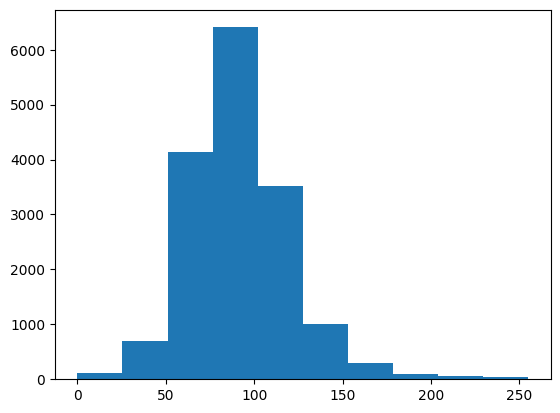

In [132]:
import matplotlib.pyplot as plt
plt.hist(all_images[0].cpu()[0].flatten())

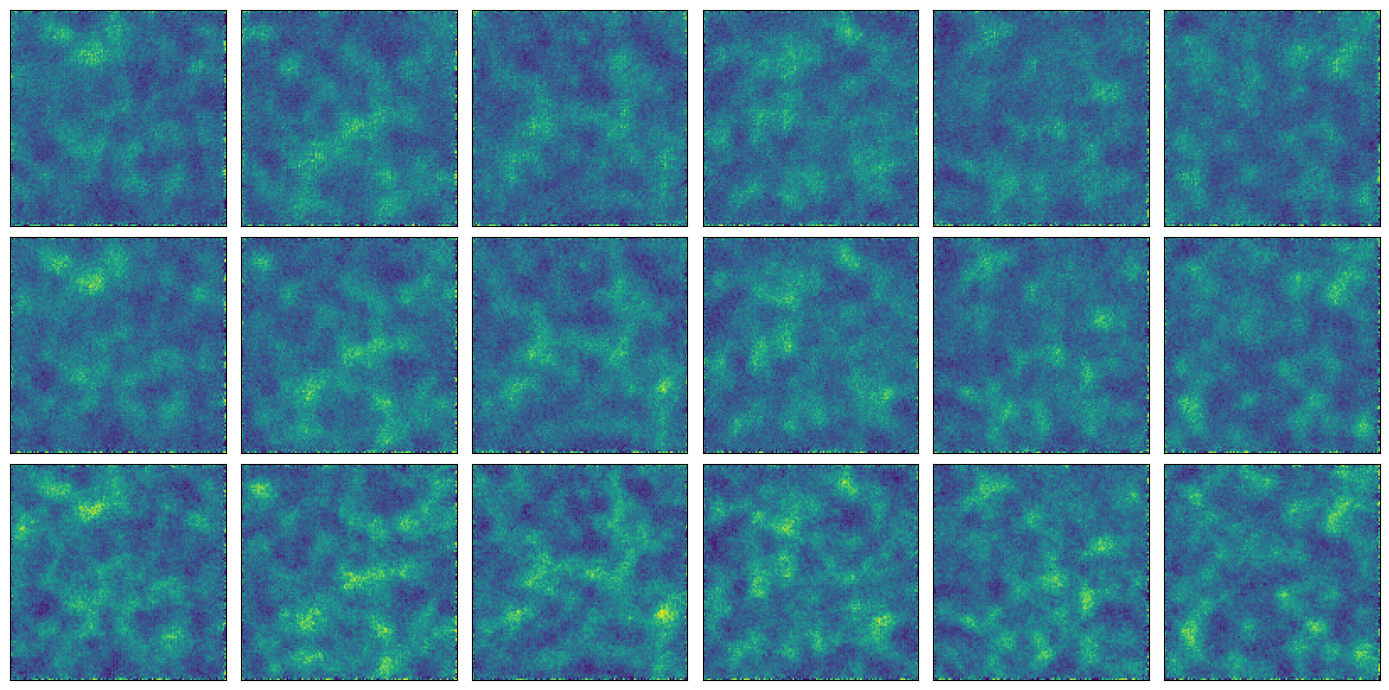

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14, 7), ncols = 6, nrows = 3)
for i in range(6):
    # a = fits.open(fi)[0].data
    for jj in range(3):
        ax[jj][i].imshow(all_images[i].cpu()[jj,:,:])
        ax[jj][i].set_xticks([])
        ax[jj][i].set_yticks([])
    
plt.tight_layout()

# check images

In [44]:
fns = glob('/pscratch/sd/s/sihany/desiimages/*.npy')
np.load(fns[0]).shape

(3, 128, 128)

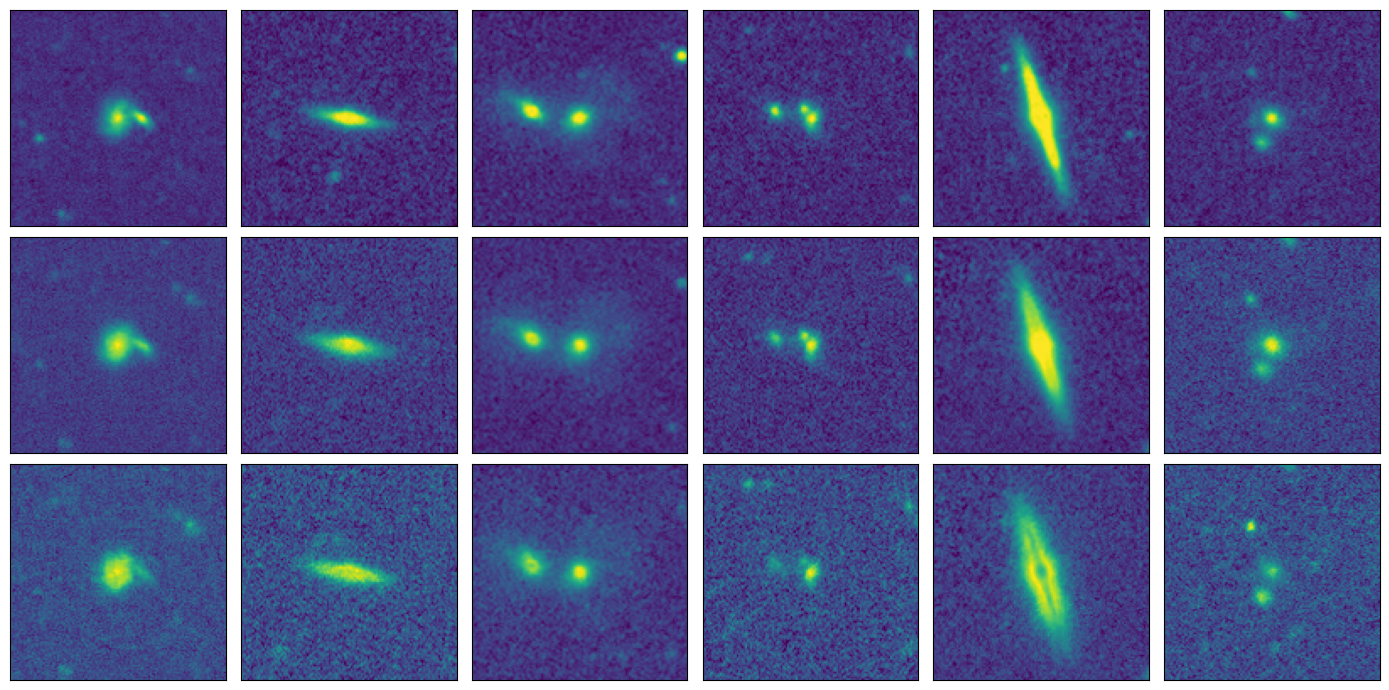

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from astropy.io import fits
from glob import glob
import random

catalog = fits.open('/pscratch/sd/v/virajvm/sandy_imgs/jura_bgs_N_20000.fits')[1].data
ids = catalog['TARGETID']
maskrflux = catalog['FLUX_R'] > 0
ids_sel = ids[maskrflux]

# fns = [f'/pscratch/sd/v/virajvm/sandy_imgs/grz_cutouts_jpg/grz_dr9_id_{eid}.jpg' for eid in ids_sel]

fns = glob('/pscratch/sd/s/sihany/desiimages/*.npy')

rfns = random.sample(fns, 6)

fig, ax = plt.subplots(figsize = (14, 7), ncols = 6, nrows = 3)
for i, fi in enumerate(rfns):
    # a = fits.open(fi)[0].data
    a = np.load(fi)
    # print(a, np.max(a), np.min(a))
    for jj in range(3):
        ax[jj][i].imshow(a[jj, :,:])
        ax[jj][i].set_xticks([])
        ax[jj][i].set_yticks([])
    
plt.tight_layout()


In [26]:
a

NameError: name 'a' is not defined

In [6]:
fns = [f'/pscratch/sd/v/virajvm/sandy_imgs/grz_cutouts_jpg/grz_dr9_id_39628065248123413.fits' for ename in [1,2,3]]

In [11]:
from os.path import basename
basename(fns[0])[11:-5]

'39628065248123413'